In [34]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))

from sklearn.decomposition import PCA

n_pca=12


pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(FA_spatial)#components_

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)


In [ ]:
af = cluster.AffinityPropagation(max_iter=5000,random_state=None,preference=-50).fit(pca_features)
print(af.n_iter_)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
print(n_clusters_)

labels=labels.reshape((nx,ny))

colors=np.random.uniform(size=(n_clusters_,3))
im=np.zeros(tuple(list(labels.shape)+[3]))

for i in range(nx):
    for j in range(ny):
        #if counts[labels[i,j]]<10:
        #    im[i,j]=np.array([1.,1.,1.])
        #else:
        im[i,j]=colors[labels[i,j]]
plt.imshow(im)

In [ ]:
n_clusters_=175
connectivity = grid_to_graph(n_x=64, n_y=64)

ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((64,64))
colors=np.random.uniform(size=(n_clusters_,3))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,64))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        if sample_silhouette_values[i,j] > 0:
            im[i,j]=colors[grains[i,j]]
        else:
            im[i,j]=colors[grains[i,j]]#np.array([1.,1.,1.])
plt.imshow(im)

In [ ]:
from sklearn.cluster import KMeans

n_clusters_=175

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,64))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        im[i,j]=colors[grains[i,j]]
plt.imshow(im)

In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('0-64-60-124/spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

n_pca=12


pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(FA_spatial)#components_

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3


In [2]:
print(pca_features.shape)

(4096, 12)


In [3]:
af = cluster.AffinityPropagation(max_iter=5000,random_state=None,preference=-50).fit(pca_features)
print(af.n_iter_)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

colors=np.random.uniform(size=(n_clusters_,3))


print(n_clusters_)

labels=labels.reshape((nx,ny))

im_ap=np.zeros(tuple(list(labels.shape)+[3]))

for i in range(nx):
    for j in range(ny):
        #if counts[labels[i,j]]<10:
        #    im[i,j]=np.array([1.,1.,1.])
        #else:
        im_ap[i,j]=colors[labels[i,j]]
#plt.imshow(im)

85
211


In [4]:
#n_clusters_=213
connectivity = grid_to_graph(n_x=64, n_y=64)

ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((64,64))
#colors=np.random.uniform(size=(n_clusters_,3))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,64))

im_hac=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        #if sample_silhouette_values[i,j] > 0:
        im_hac[i,j]=colors[grains[i,j]]
        #else:
        #    im_hac[i,j]=colors[grains[i,j]]#np.array([1.,1.,1.])
#plt.imshow(im)

(4096,)


In [5]:
from sklearn.cluster import KMeans

#n_clusters_=213

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,64))

#colors=np.random.uniform(size=(n_clusters_,3))

im_km=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        im_km[i,j]=colors[grains[i,j]]
#plt.imshow(im)

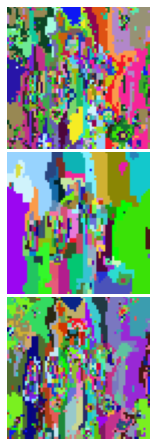

In [8]:
fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=3, ncols=1, left=0, right=1.5,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

ax1 = fig.add_subplot(gs[0,0])

ax1.axis('off')
im=ax1.imshow(im_ap)

ax2 = fig.add_subplot(gs[1,0])

ax2.axis('off')
im=ax2.imshow(im_hac)

ax3 = fig.add_subplot(gs[2,0])

ax3.axis('off')
im=ax3.imshow(im_km)

(4096, 4)
4096
(4096, 8)
4096
(4096, 12)
4096
(4096, 16)
4096


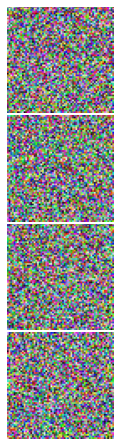

In [3]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_frequency=np.load('0-64-60-124/frequency_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=1, left=0, right=1.5,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

for n_pca in (4,8,12,16):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_frequency)#components_
    print(pca_features.shape)
    af = cluster.AffinityPropagation(max_iter=5000,random_state=None,preference=-50).fit(pca_features)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_
    n_clusters_ = len(cluster_centers_indices)
    print(n_clusters_)
    colors=np.random.uniform(size=(n_clusters_,3))
    labels=labels.reshape((nx,ny))
    im=np.zeros(tuple(list(labels.shape)+[3]))
    for i in range(nx):
        for j in range(ny):
            im[i,j]=colors[labels[i,j]]
    ax = fig.add_subplot(gs[n_pca//4 - 1,0])
    ax.axis('off')
    ax.imshow(im)

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

In [3]:
import sys
import time
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('0-64-60-124/spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=1, left=0, right=1.5,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

for n_pca in (4,8,12,16):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    print(pca_features.shape)
    time_start=time.time()
    af = cluster.AffinityPropagation(max_iter=5000,random_state=None,preference=-50).fit(pca_features)
    time_end=time.time()
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_
    n_clusters_ = len(cluster_centers_indices)
    print(n_clusters_)
    colors=np.random.uniform(size=(n_clusters_,3))
    np.save("ap_%i"%n_pca,(labels,time_end-time_start))
    #labels=labels.reshape((nx,ny))
    #im=np.zeros(tuple(list(labels.shape)+[3]))
    #for i in range(nx):
    #    for j in range(ny):
    #        im[i,j]=colors[labels[i,j]]
    #ax = fig.add_subplot(gs[n_pca//4 - 1,0])
    #ax.axis('off')
    #ax.imshow(im)

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3
(4096, 4)
78
(4096, 8)
150
(4096, 12)
210
(4096, 16)
268


<Figure size 864x864 with 0 Axes>

In [8]:
import sys
import time
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


#n_clusters_=213



import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('0-64-60-124/spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=1, left=0, right=1.5,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

for n_pca in (4,8,12,16):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    print(pca_features.shape)
    n_clusters_=np.unique(np.load("ap_%i.npy"%n_pca,allow_pickle=True)[0]).shape[0]
    time_start=time.time()
    labels = cluster.KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
    time_end=time.time()
    print(time_end-time_start)
    np.save("kmean_%i"%n_pca,(labels,time_end-time_start))
    #labels=labels.reshape((nx,ny))
    #im=np.zeros(tuple(list(labels.shape)+[3]))
    #for i in range(nx):
    #    for j in range(ny):
    #        im[i,j]=colors[labels[i,j]]
    #ax = fig.add_subplot(gs[n_pca//4 - 1,0])
    #ax.axis('off')
    #ax.imshow(im)

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3
(4096, 4)
1.643378496170044
(4096, 8)
3.059873580932617
(4096, 12)
4.422407627105713
(4096, 16)
5.28234076499939


<Figure size 864x864 with 0 Axes>

In [46]:
import sys
import time
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft

#from sklearn.cluster import KMeans

#n_clusters_=213



import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics

connectivity = grid_to_graph(n_x=64, n_y=64)

nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('0-64-60-124/spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=1, left=0, right=1.5,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

for n_pca in (4,8,12,16):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    print(pca_features.shape)
    n_clusters_=np.unique(np.load("ap_%i.npy"%n_pca,allow_pickle=True)[0]).shape[0]
    print(n_clusters_)
    time_start=time.time()
    ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)
    time_end=time.time()
    labels = ward.labels_
    print(time_end-time_start)
    np.save("hac_%i"%n_pca,(labels,time_end-time_start))
    #labels=labels.reshape((nx,ny))
    #im=np.zeros(tuple(list(labels.shape)+[3]))
    #for i in range(nx):
    #    for j in range(ny):
    #        im[i,j]=colors[labels[i,j]]
    #ax = fig.add_subplot(gs[n_pca//4 - 1,0])
    #ax.axis('off')
    #ax.imshow(im)

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

(4096, 4)
78
0.3838069438934326
(4096, 8)
150
0.3867816925048828
(4096, 12)
210
0.37481236457824707
(4096, 16)
268
0.3847811222076416


<Figure size 864x864 with 0 Axes>

(78, 3)
(78, 3)
(78, 3)
(150, 3)
(150, 3)
(150, 3)
(210, 3)
(210, 3)
(210, 3)
(268, 3)
(268, 3)
(268, 3)


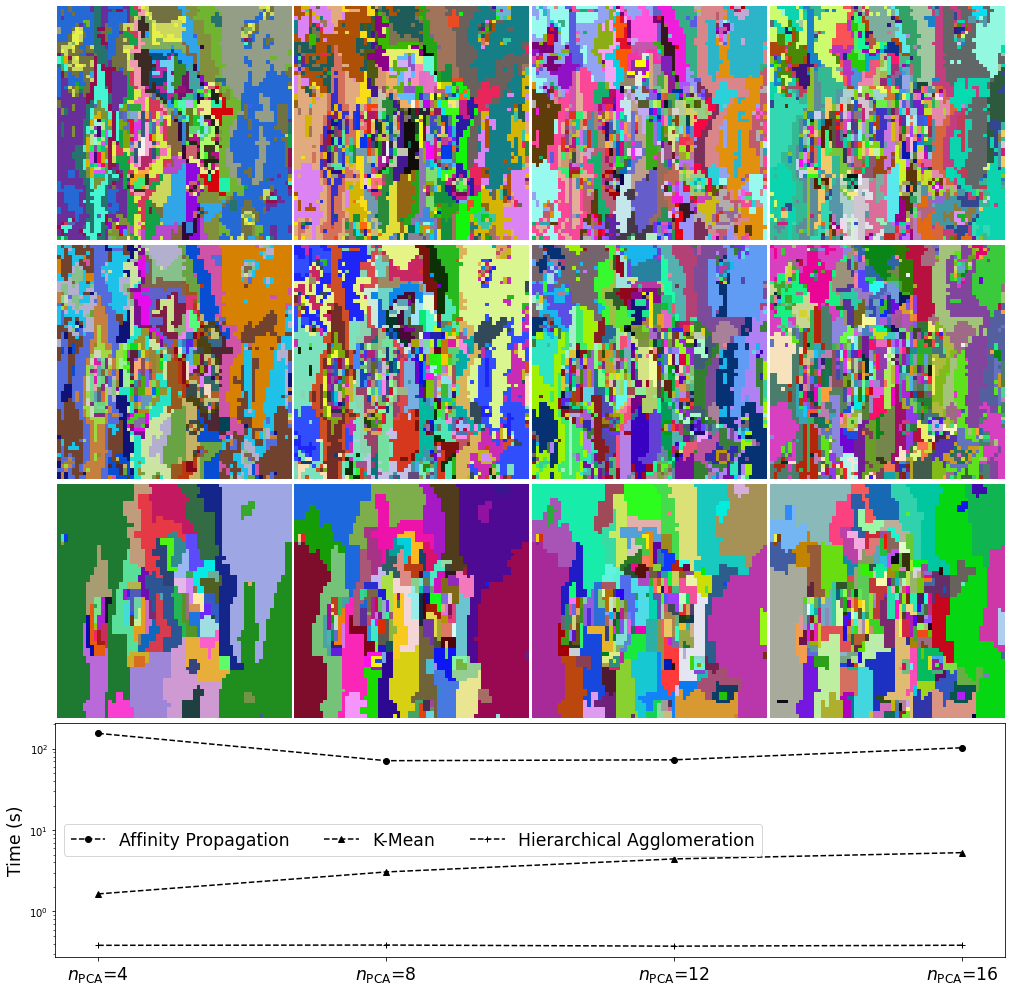

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.1,bottom=0,top=1.1, wspace=0.002,hspace=0.02)
algs=('ap','kmean','hac')
n_pca=(4,8,12,16)
times=np.zeros((4,3))

for i in range(4):
    for j in range(3):
        labels,times[i,j]=np.load("%s_%i.npy"%(algs[j],n_pca[i]),allow_pickle=True)#[0]
        labels=labels.reshape((nx,ny))
        colors=np.random.uniform(size=(np.unique(labels).shape[0],3))
        print(colors.shape)
        im=np.zeros(tuple(list(labels.shape)+[3]))
        for k in range(nx):
            for l in range(ny):
                im[k,l]=colors[labels[k,l]]
        ax = fig.add_subplot(gs[j,i])
        ax.axis('off')
        ax.imshow(im)
ax=fig.add_subplot(gs[3,:])
ax.set_yscale('log')

#ax.set_xlabel("$n_{\mathrm{PCA}}$",size='xx-large')
ax.set_ylabel("Time (s)",size='xx-large')
ax.set_xticks((4,8,12,16))#,fontsize='xx-large') 
ax.set_xticklabels(['$n_{\mathrm{PCA}}$=4', '$n_{\mathrm{PCA}}$=8', '$n_{\mathrm{PCA}}$=12', '$n_{\mathrm{PCA}}$=16'],size='xx-large')



t0,=ax.plot(n_pca,times[:,0],'ko--')
t1,=ax.plot(n_pca,times[:,1],'k^--')
t2,=ax.plot(n_pca,times[:,2],'k+--')

ax.legend([t0,t1,t2],['Affinity Propagation','K-Mean','Hierarchical Agglomeration'],fontsize='xx-large',ncol=3,loc='best')

plt.savefig('fig5.tif',format='tif',bbox_inches ='tight')

#print(times)